In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
X = tf.range(-100,100,4)
y = X + 50

y, X

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-50, -46, -42, -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,
          2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
         54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102,
        106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>)

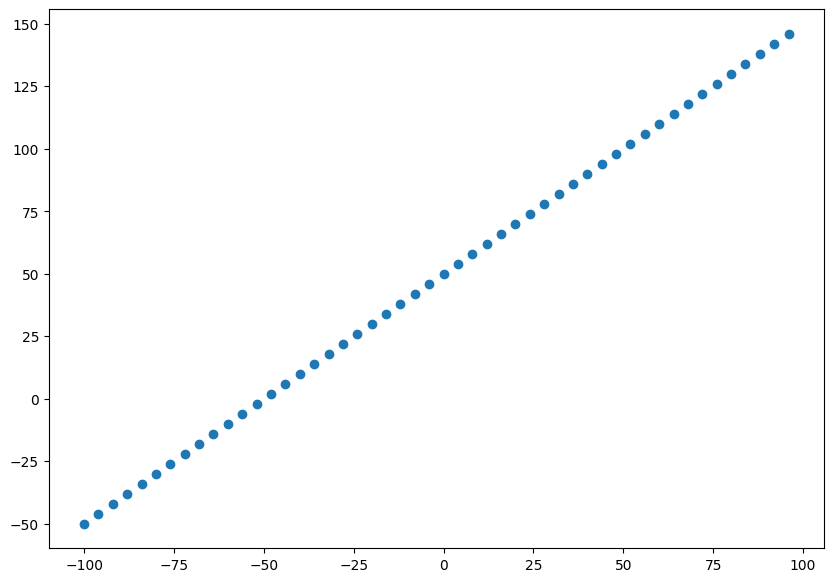

In [3]:
plt.figure(figsize=[10,7])
plt.scatter(X,y);

In [4]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-50, -46, -42, -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,
          2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
         54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102,
        106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

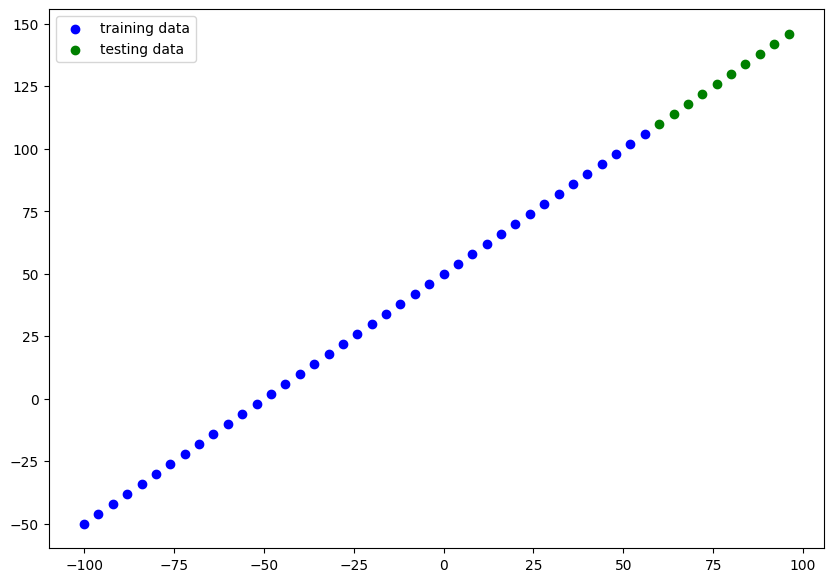

In [5]:
plt.figure(figsize=[10,7])
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.legend();

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=[1],name = "input_layer"),
    tf.keras.layers.Dense(100,input_shape=[1],name = "hidden_layer_1"),
    tf.keras.layers.Dense(20,input_shape=[1],name = "hidden_layer_2"),
    tf.keras.layers.Dense(1,name = "output_layer")
])

model.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = (["mse"]))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               5100      
                                                                 
 hidden_layer_2 (Dense)      (None, 20)                2020      
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 7241 (28.29 KB)
Trainable params: 7241 (28.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


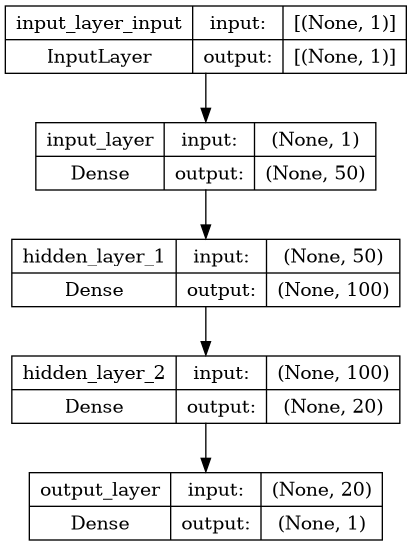

In [7]:
plot_model(model, show_shapes = True)

In [8]:
model.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
2/2 [==============================] - 1s 13ms/step - loss: 3767.7317 - mse: 3767.7317
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 2317.4971 - mse: 2317.4971
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 3374.8530 - mse: 3374.8530
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 2526.1824 - mse: 2526.1824
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 1924.7701 - mse: 1924.7701
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 2662.3918 - mse: 2662.3918
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 2318.0696 - mse: 2318.0696
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 1972.1494 - mse: 1972.1494
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 2287.5056 - mse: 2287.5056
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 2136.0298 - mse: 2136.0298
Epoch 11/50
2/2 [===========

In [9]:
y_preds = model.predict(X_test)
y_preds, y_test

1/1 [==============================] - 0s 106ms/step


(array([[108.18536 ],
        [112.30818 ],
        [116.431046],
        [120.55388 ],
        [124.67671 ],
        [128.79955 ],
        [132.9224  ],
        [137.04524 ],
        [141.16808 ],
        [145.29091 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

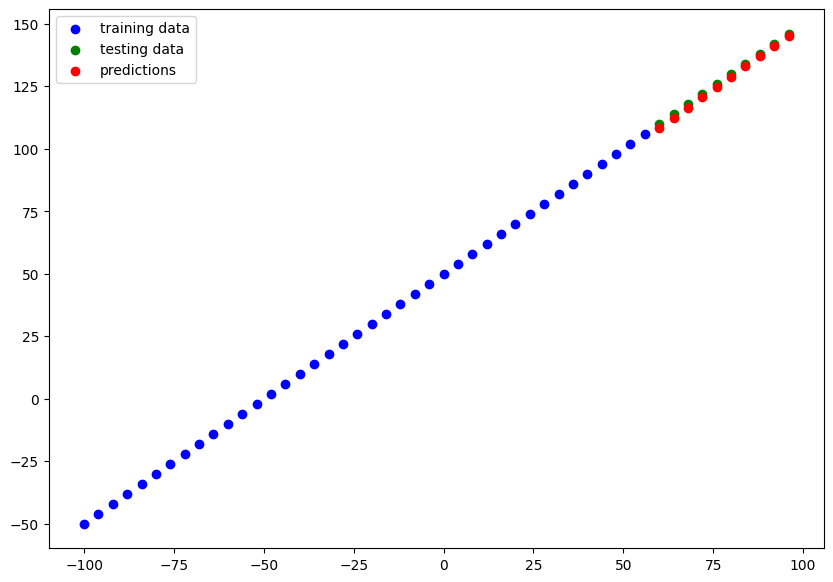

In [10]:
plt.figure(figsize=[10,7])
plt.scatter(X_train,y_train,c="b",label="training data")
plt.scatter(X_test,y_test,c="g",label="testing data")
plt.scatter(X_test,y_preds,c="r",label="predictions")
plt.legend();